In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
df = pd.read_csv("../pruneabletree/tests/results/pruning/all.csv")
dfs = df.loc[df.tool == "scikit"]
dfw = df.loc[df.tool == "weka"]

In [45]:
df.loc[df.dataset == 'letter'].groupby(["config", "tool"]).mean().n_nodes

config       tool  
early_stop   scikit      78.74
ebp_0.00001  scikit    1644.24
             weka      1799.86
ebp_0.00100  scikit    2064.72
             weka      2171.16
ebp_0.10000  scikit    3137.98
             weka      3126.78
none         scikit    3916.08
             weka      4001.04
rep_0.1      scikit    1111.86
             weka      1156.66
rep_0.2      scikit    1382.42
             weka      1401.50
rep_0.5      scikit    1457.10
             weka      1436.58
Name: n_nodes, dtype: float64

# scikit tree sizes per config per dataset

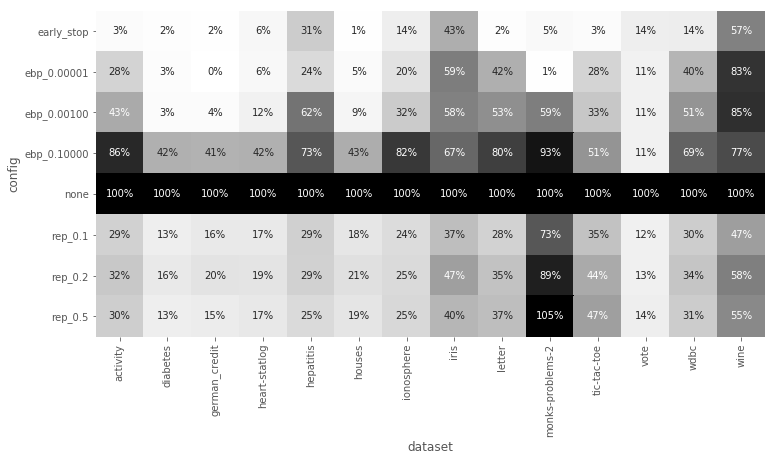

In [12]:
max_nodes = dfs.loc[dfs.config == 'none'].groupby(["dataset"])["n_nodes"].mean()

data = dfs.groupby(["config", "dataset"])["n_nodes"].mean().unstack() / max_nodes
#     print(dfs.groupby(["config", "dataset"])[param].mean().unstack())
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".0%", vmin=0, vmax=1, ax=ax, cmap='Greys', cbar=False)
plt.savefig("../pruneabletree/tests/results/pruning/heatmap_n_nodes.pdf", bbox_inches="tight")

# scikit vs weka tree size

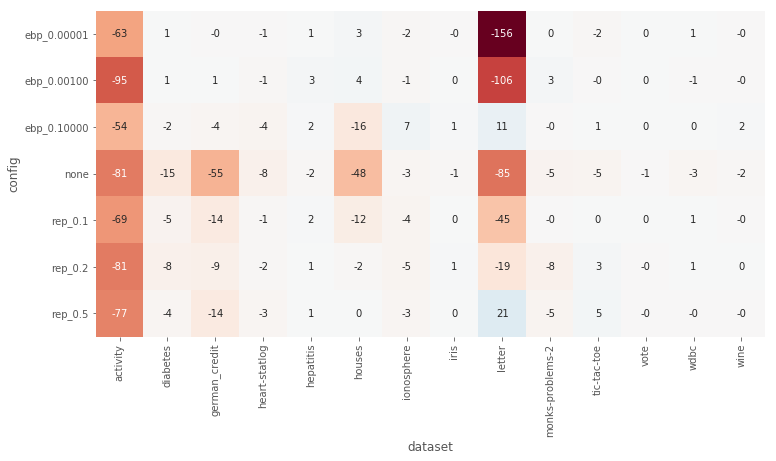

In [37]:
nodes_s = dfs.loc[dfs.config != "early_stop"].groupby(["config", "dataset"]).n_nodes.mean().unstack()
nodes_w = dfw.groupby(["config", "dataset"]).n_nodes.mean().unstack()
data = (nodes_s - nodes_w)
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".0f", ax=ax, cmap='RdBu', cbar=False, vmin=-156, vmax=156)
plt.savefig("../pruneabletree/tests/results/pruning/heatmap_n_nodes_diff.pdf", bbox_inches="tight")

# max_nodes_s = dfs.loc[dfs.config == 'none'].groupby(["dataset"])["n_nodes"].mean()
# max_nodes_w = dfw.loc[dfw.config == 'none'].groupby(["dataset"])["n_nodes"].mean()

# nodes_s = dfs.loc[dfs.config != "early_stop"].groupby(["config", "dataset"]).n_nodes.mean().unstack() / max_nodes_s
# nodes_w = dfw.groupby(["config", "dataset"]).n_nodes.mean().unstack() / max_nodes_w
# data = nodes_s - nodes_w
# f, ax = plt.subplots(figsize=(12, 6))
# sns.heatmap(data, annot=True, fmt=".0%", ax=ax, cmap='Greys', cbar=False, vmin=-0.10, vmax=.25)

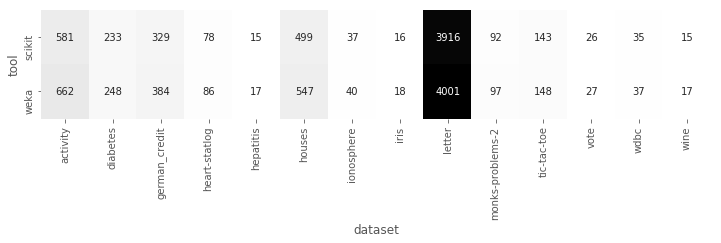

In [30]:
data = df.loc[df.config == "none"].groupby(["tool", "dataset"]).n_nodes.mean().unstack()
f, ax = plt.subplots(figsize=(12, 2))
sns.heatmap(data, annot=True, fmt=".0f", vmin=0, ax=ax, cmap='Greys', cbar=False)
plt.savefig("../pruneabletree/tests/results/pruning/heatmap_n_nodes_unpruned.pdf", bbox_inches="tight")

# scikit accuracy

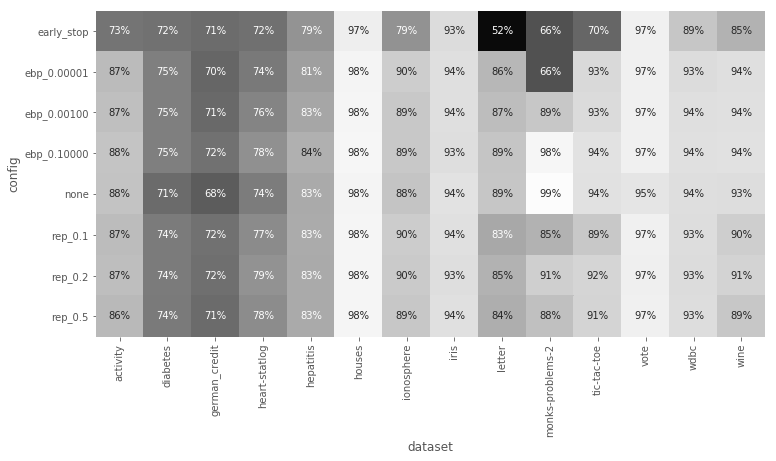

In [23]:
data = dfs.groupby(["config", "dataset"])["accuracy"].mean().unstack()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".0%", vmin=0.5, vmax=1, ax=ax, cmap='gray', cbar=False)
plt.savefig("../pruneabletree/tests/results/pruning/heatmap_accuracy.pdf", bbox_inches="tight")

# scikit vs weka accuracy

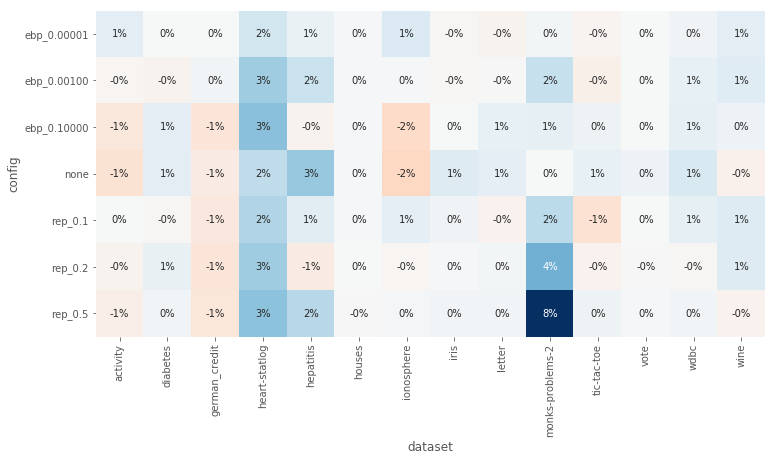

In [39]:
data_s = dfs.loc[dfs.config != "early_stop"].groupby(["config", "dataset"])["accuracy"].mean().unstack()
data_w = dfw.groupby(["config", "dataset"])["accuracy"].mean().unstack()
data = data_s - data_w
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".0%", vmin=-0.08, vmax=0.08, ax=ax, cmap='RdBu', cbar=False)
plt.savefig("../pruneabletree/tests/results/pruning/heatmap_accuracy_diff.pdf", bbox_inches="tight")

# scikit timings

In [5]:
dfs.columns

Index(['config', 'accuracy', 'dataset', 'f1', 'fit_time_ms', 'n_leaves',
       'n_nodes', 'p_ebp_confidence', 'p_min_samples_leaf', 'p_prune',
       'p_rep_val_percentage', 'score_time_ms', 'tool'],
      dtype='object')

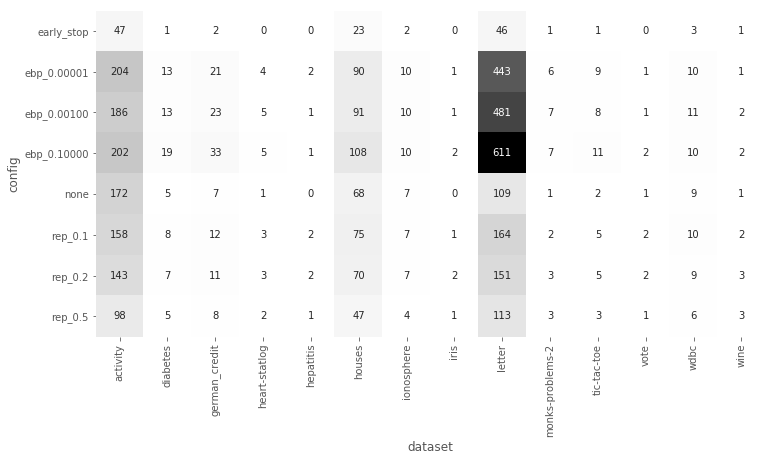

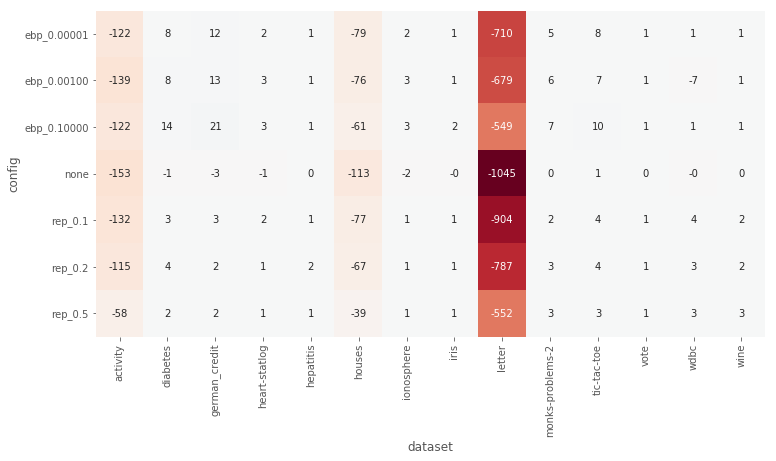

In [46]:
data = dfs.groupby(["config", "dataset"])["fit_time_ms"].mean().unstack()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".0f", ax=ax, cmap='Greys', cbar=False)
plt.savefig("../pruneabletree/tests/results/pruning/heatmap_fit_time.pdf", bbox_inches="tight")

data_s = dfs.loc[dfs.config != "early_stop"].groupby(["config", "dataset"])["fit_time_ms"].mean().unstack()
data_w = dfw.groupby(["config", "dataset"])["fit_time_ms"].mean().unstack()
data = data_s - data_w
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(data, annot=True, fmt=".0f", ax=ax, cmap='RdBu', cbar=False, vmin=-1045, vmax=1045)
plt.savefig("../pruneabletree/tests/results/pruning/heatmap_fit_time_diff.pdf", bbox_inches="tight")

# data = dfs.groupby(["config", "dataset"])["score_time_ms"].mean().unstack()
# f, ax = plt.subplots(figsize=(12, 6))
# sns.heatmap(data, annot=True, fmt=".0f", ax=ax, cmap='Greys', cbar=False)

# data = dfw.groupby(["config", "dataset"])["score_time_ms"].mean().unstack()
# f, ax = plt.subplots(figsize=(12, 6))
# sns.heatmap(data, annot=True, fmt=".0f", ax=ax, cmap='Greys', cbar=False)